<a href="https://colab.research.google.com/github/NicoloAvesani/social_research/blob/main/Copia_di_immigration_to_italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
# social research project

https://www.kaggle.com/datasets/luigigno/italy-immigration-data-by-the-un

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [236]:
italy_imm_data = pd.read_excel('Italy.xlsx')

In [237]:
italy_imm_data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Emigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,..,...,1,0,1,0,8,11,13,14,8,19
1,Emigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,..,...,674,929,910,836,925,1110,1495,1525,1794,2296
2,Emigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,..,...,104,82,81,75,127,149,152,165,140,159
3,Emigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,..,...,0,0,2,3,2,3,0,0,2,4
4,Emigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,..,...,12,10,12,4,7,9,35,7,11,22


In [238]:
italy_imm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      388 non-null    object
 1   Coverage  388 non-null    object
 2   OdName    388 non-null    object
 3   AREA      388 non-null    int64 
 4   AreaName  388 non-null    object
 5   REG       388 non-null    int64 
 6   RegName   388 non-null    object
 7   DEV       388 non-null    int64 
 8   DevName   388 non-null    object
 9   1980      388 non-null    object
 10  1981      388 non-null    object
 11  1982      388 non-null    object
 12  1983      388 non-null    object
 13  1984      388 non-null    object
 14  1985      388 non-null    object
 15  1986      388 non-null    object
 16  1987      388 non-null    object
 17  1988      388 non-null    object
 18  1989      388 non-null    object
 19  1990      388 non-null    object
 20  1991      388 non-null    object
 21  1992      388 no

In [239]:
italy_imm_data.replace(['..'],0, inplace = True)

In [240]:
italy_imm_data = italy_imm_data[italy_imm_data['Type'] == 'Immigrants']
italy_imm_data = italy_imm_data.drop(italy_imm_data.index[-2:])
italy_imm_data

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,0,...,64,145,171,856,1175,1017,694,847,1109,1147
193,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,38807,28358,23099,23292,35715,27493,22591,16613,14118,12165
194,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,0,...,2892,1190,976,920,1376,1132,1199,1089,944,935
195,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,15,3,5,4,13,13,7,3,4,1
196,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,98,80,76,45,85,83,78,69,91,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Immigrants,Foreigners,Venezuela (Bolivarian Republic of),904,Latin America and the Caribbean,931,South America,902,Developing regions,0,...,828,805,627,790,848,704,802,738,584,528
382,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,0,...,58,136,183,272,326,301,306,230,141,159
383,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,0,...,26,21,24,19,26,26,18,16,8,21
384,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,0,...,19,31,28,11,25,18,17,23,12,15


In [241]:
italy_imm_data.rename(columns={'OdName':'Country'}, inplace=True)

In [242]:
italy_imm_data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'German

In [243]:
# since there is ITALY as country of departure, we have to remove it

italy_imm_data = italy_imm_data[italy_imm_data.Country != 'Italy']
italy_imm_data

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,0,...,64,145,171,856,1175,1017,694,847,1109,1147
193,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,0,...,38807,28358,23099,23292,35715,27493,22591,16613,14118,12165
194,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,0,...,2892,1190,976,920,1376,1132,1199,1089,944,935
195,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,15,3,5,4,13,13,7,3,4,1
196,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,0,...,98,80,76,45,85,83,78,69,91,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Immigrants,Foreigners,Venezuela (Bolivarian Republic of),904,Latin America and the Caribbean,931,South America,902,Developing regions,0,...,828,805,627,790,848,704,802,738,584,528
382,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,0,...,58,136,183,272,326,301,306,230,141,159
383,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,0,...,26,21,24,19,26,26,18,16,8,21
384,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,0,...,19,31,28,11,25,18,17,23,12,15


In [256]:
italy_imm_data[1995]

192       0
193    3411
194       0
195       0
196       0
       ... 
381     280
382       0
383       0
384       0
385       0
Name: 1995, Length: 193, dtype: int64

In [171]:
italy_mask = italy_imm_data['Country'] == 'Italy'
italy_imm_data[italy_mask]

,Type,Coverage,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


In [260]:
# there are 3 columns 'AREA','REG','DEV' that are not useful, as they represent code--> drop them

italy_imm_data = italy_imm_data.drop(['AREA', 'REG', 'DEV'], axis=1)

In [259]:
# since I want to understand the total number of migrants from every country, I add the 'Total' column
italy_imm_data['Total'] = italy_imm_data.sum(axis=1)

<ipython-input-259-5091f58cbcfa>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  italy_imm_data['Total'] = italy_imm_data.sum(axis=1)


In [174]:
italy_imm_data.columns

Index([    'Type', 'Coverage',  'Country', 'AreaName',  'RegName',  'DevName',
             1980,       1981,       1982,       1983,       1984,       1985,
             1986,       1987,       1988,       1989,       1990,       1991,
             1992,       1993,       1994,       1995,       1996,       1997,
             1998,       1999,       2000,       2001,       2002,       2003,
             2004,       2005,       2006,       2007,       2008,       2009,
             2010,       2011,       2012,       2013,    'Total'],
      dtype='object')

In [257]:
italy_imm_data = italy_imm_data.drop(columns = [1980,       1981,       1982,       1983,       1984,       1985,
             1986,       1987,       1988,       1989,       1990,       1991,
             1992,       1993,       1994,     2001,])

In [261]:
df_sorted = italy_imm_data.sort_values(by='Total', ascending=False)

In [262]:
df_sorted

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
332,Immigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,2321,6701,6755,6818,...,45338,39715,271443,174554,105597,92116,90096,81666,58227,1175010
193,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,3411,20508,15009,19813,...,28358,23099,23292,35715,27493,22591,16613,14118,12165,438160
307,Immigrants,Foreigners,Morocco,Africa,Northern Africa,Developing regions,4937,22289,14957,12816,...,26057,21784,23483,37275,33128,29960,23885,19590,19568,422829
373,Immigrants,Foreigners,Ukraine,Europe,Eastern Europe,Developed regions,161,430,436,741,...,15675,14821,15487,24039,22594,30416,17889,11510,12814,256597
227,Immigrants,Foreigners,China,Asia,Eastern Asia,Developing regions,1448,4500,7305,0,...,14732,13579,9719,12791,16843,22866,20055,20463,17592,208075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,Immigrants,Foreigners,Vanuatu,Oceania,Melanesia,Developing regions,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2748
349,Immigrants,Foreigners,Solomon Islands,Oceania,Melanesia,Developing regions,0,0,0,0,...,0,0,0,2,1,0,0,1,0,2744
335,Immigrants,Foreigners,Saint Kitts and Nevis,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,1,...,3,0,0,0,4,1,0,3,0,2742
229,Immigrants,Foreigners,Comoros,Africa,Eastern Africa,Developing regions,0,0,0,0,...,1,1,0,3,2,0,2,4,1,2737


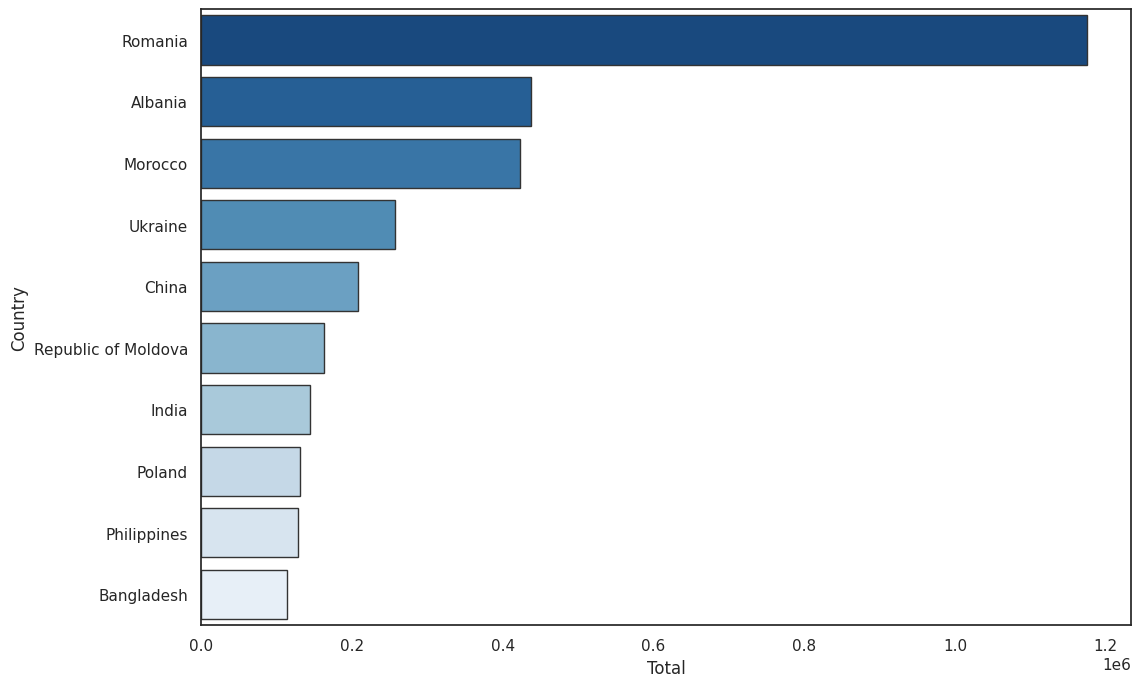

In [263]:
# let's see the main country of departure

plt.figure(figsize=(12,8))
sb.set(style="white")
sb.barplot(x=df_sorted.Total.head(10), y=df_sorted.Country.head(10),
            palette="Blues_r", edgecolor=".2");

In [145]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [179]:
import plotly.express as px

In [264]:
top_10 = df_sorted.head(10)
top_10

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
332,Immigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,2321,6701,6755,6818,...,45338,39715,271443,174554,105597,92116,90096,81666,58227,1175010
193,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions,3411,20508,15009,19813,...,28358,23099,23292,35715,27493,22591,16613,14118,12165,438160
307,Immigrants,Foreigners,Morocco,Africa,Northern Africa,Developing regions,4937,22289,14957,12816,...,26057,21784,23483,37275,33128,29960,23885,19590,19568,422829
373,Immigrants,Foreigners,Ukraine,Europe,Eastern Europe,Developed regions,161,430,436,741,...,15675,14821,15487,24039,22594,30416,17889,11510,12814,256597
227,Immigrants,Foreigners,China,Asia,Eastern Asia,Developing regions,1448,4500,7305,0,...,14732,13579,9719,12791,16843,22866,20055,20463,17592,208075
331,Immigrants,Foreigners,Republic of Moldova,Europe,Eastern Europe,Developed regions,532,67,45,116,...,9311,7795,12989,22007,16812,26591,14956,8813,8064,162802
269,Immigrants,Foreigners,India,Asia,Southern Asia,Developing regions,869,2756,3150,3082,...,7172,6292,7112,12469,12769,15246,13327,11158,10814,144082
327,Immigrants,Foreigners,Poland,Europe,Eastern Europe,Developed regions,1381,3262,3783,2738,...,10385,11791,19101,12314,9123,7174,5471,4618,3506,131213
326,Immigrants,Foreigners,Philippines,Asia,South-Eastern Asia,Developing regions,2108,6110,8056,8832,...,5546,4428,3951,7849,9995,10745,10351,9893,7565,128516
205,Immigrants,Foreigners,Bangladesh,Asia,Southern Asia,Developing regions,343,1573,2709,1815,...,5781,5631,5223,9332,8902,9688,10348,10144,10487,113702


In [148]:
'''import pandas as pd
import matplotlib.pyplot as plt

#Filter DataFrame for the desired year
year = int(input("Enter a year between 2002 and 2013: "))
df_year = italy_imm_data[['Country', (year)]]


#Sort countries based on the number of immigrants
df_year_sorted = df_year.sort_values(by=year, ascending=False)

#Select top 10 countries
top_10_countries = df_year_sorted.head(10)

# Step 5: Plot the results
plt.bar(top_10_countries['Country'], top_10_countries[year])
plt.xlabel('Country')
plt.ylabel('Number of Immigrants')
plt.title(f'Top 10 Countries with the Highest Number of Immigrants in {year}')
plt.xticks(rotation=90)
plt.show()'''


'import pandas as pd\nimport matplotlib.pyplot as plt\n\n#Filter DataFrame for the desired year\nyear = int(input("Enter a year between 2002 and 2013: "))\ndf_year = italy_imm_data[[\'Country\', (year)]]\n\n\n#Sort countries based on the number of immigrants\ndf_year_sorted = df_year.sort_values(by=year, ascending=False)\n\n#Select top 10 countries\ntop_10_countries = df_year_sorted.head(10)\n\n# Step 5: Plot the results\nplt.bar(top_10_countries[\'Country\'], top_10_countries[year])\nplt.xlabel(\'Country\')\nplt.ylabel(\'Number of Immigrants\')\nplt.title(f\'Top 10 Countries with the Highest Number of Immigrants in {year}\')\nplt.xticks(rotation=90)\nplt.show()'

In [149]:
'''fig, ax = plt.subplots(figsize=(10, 6))
top_10_year_df = df_year_sorted.head(10)
plt.barh(top_10_year_df['Country'], top_10_year_df[year])'''

"fig, ax = plt.subplots(figsize=(10, 6))\ntop_10_year_df = df_year_sorted.head(10)\nplt.barh(top_10_year_df['Country'], top_10_year_df[year])"

In [150]:
'''fig, ax = plt.subplots(figsize=(15, 8))
dff = top_10_year_df[::-1]
ax.barh(dff['Country'], dff[year])
for i, (value, name) in enumerate(zip( dff[year],dff['Country'])):

    ax.text(value, i,     value, ha='left')

ax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right')'''

"fig, ax = plt.subplots(figsize=(15, 8))\ndff = top_10_year_df[::-1]\nax.barh(dff['Country'], dff[year])\nfor i, (value, name) in enumerate(zip( dff[year],dff['Country'])):\n\n    ax.text(value, i,     value, ha='left')\n    \nax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right')"

In [185]:
!pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [267]:
italy_imm_data.T

,192,193,194,195,196,197,198,199,200,201,...,376,377,378,379,380,381,382,383,384,385
Type,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,...,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants,Immigrants
Coverage,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,...,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners,Foreigners
Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
AreaName,Asia,Europe,Africa,Europe,Africa,Latin America and the Caribbean,Latin America and the Caribbean,Asia,Oceania,Europe,...,Africa,Northern America,Latin America and the Caribbean,Asia,Oceania,Latin America and the Caribbean,Asia,Asia,Africa,Africa
RegName,Southern Asia,Southern Europe,Northern Africa,Southern Europe,Middle Africa,Caribbean,South America,Western Asia,Australia and New Zealand,Western Europe,...,Eastern Africa,Northern America,South America,Central Asia,Melanesia,South America,South-Eastern Asia,Western Asia,Eastern Africa,Eastern Africa
DevName,Developing regions,Developed regions,Developing regions,Developed regions,Developing regions,Developing regions,Developing regions,Developing regions,Developed regions,Developed regions,...,Developing regions,Developed regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions
1995,0,3411,0,0,0,0,834,0,0,0,...,0,990,0,0,0,280,0,0,0,0
1996,0,20508,0,0,0,0,745,0,0,0,...,0,1173,0,0,0,384,0,0,0,0
1997,0,15009,0,0,0,0,594,0,0,0,...,0,1094,0,0,0,350,0,0,0,0
1998,93,19813,1234,5,104,0,528,15,187,427,...,57,1249,88,181,0,292,35,4,13,8


In [269]:
df = italy_imm_data.T
df = df.drop(df.index[:6])
df.columns = italy_imm_data['Country'].unique()
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
1995,0,3411,0,0,0,0,834,0,0,0,...,0,990,0,0,0,280,0,0,0,0
1996,0,20508,0,0,0,0,745,0,0,0,...,0,1173,0,0,0,384,0,0,0,0
1997,0,15009,0,0,0,0,594,0,0,0,...,0,1094,0,0,0,350,0,0,0,0
1998,93,19813,1234,5,104,0,528,15,187,427,...,57,1249,88,181,0,292,35,4,13,8
1999,105,28668,1425,7,108,2,564,26,145,377,...,46,1010,57,243,4,341,94,4,14,7
2000,34,31992,1380,6,109,0,717,30,205,412,...,67,1285,106,193,2,472,95,11,23,12
2002,48,24478,873,4,97,11,3907,32,203,337,...,55,1143,132,95,0,499,105,26,9,11
2003,50,49296,2517,7,114,12,5694,45,256,383,...,80,1359,337,176,0,1069,118,39,16,17
2004,64,38807,2892,15,98,13,4631,33,265,381,...,67,1310,401,131,1,828,58,26,19,68
2005,145,28358,1190,3,80,2,2746,49,290,366,...,64,1374,316,106,2,805,136,21,31,19


In [270]:
df = df.drop(df.index[-1:])

In [274]:
df['year'] = np.arange(1995,2013)
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,year
1995,0,3411,0,0,0,0,834,0,0,0,...,990,0,0,0,280,0,0,0,0,1995
1996,0,20508,0,0,0,0,745,0,0,0,...,1173,0,0,0,384,0,0,0,0,1996
1997,0,15009,0,0,0,0,594,0,0,0,...,1094,0,0,0,350,0,0,0,0,1997
1998,93,19813,1234,5,104,0,528,15,187,427,...,1249,88,181,0,292,35,4,13,8,1998
1999,105,28668,1425,7,108,2,564,26,145,377,...,1010,57,243,4,341,94,4,14,7,1999
2000,34,31992,1380,6,109,0,717,30,205,412,...,1285,106,193,2,472,95,11,23,12,2000
2002,48,24478,873,4,97,11,3907,32,203,337,...,1143,132,95,0,499,105,26,9,11,2001
2003,50,49296,2517,7,114,12,5694,45,256,383,...,1359,337,176,0,1069,118,39,16,17,2002
2004,64,38807,2892,15,98,13,4631,33,265,381,...,1310,401,131,1,828,58,26,19,68,2003
2005,145,28358,1190,3,80,2,2746,49,290,366,...,1374,316,106,2,805,136,21,31,19,2004


In [275]:
df =  df.set_index('year')
df = df.astype(int)

In [276]:
import bar_chart_race as bcr
bcr.bar_chart_race(
    df = df,
    title = 'Number of immigrants arriving in Italy',
    label_bars=True,
    n_bars = 10,
    orientation = 'h',
    cmap = 'prism',
    period_length=2000,
    fixed_max = True
)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canva

# Romania

In [288]:
romania_mask = df_sorted['Country'] == 'Romania'
romania_df = df_sorted[romania_mask]

romania_df

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
332,Immigrants,Foreigners,Romania,Europe,Eastern Europe,Developed regions,2321,6701,6755,6818,...,45338,39715,271443,174554,105597,92116,90096,81666,58227,1175010


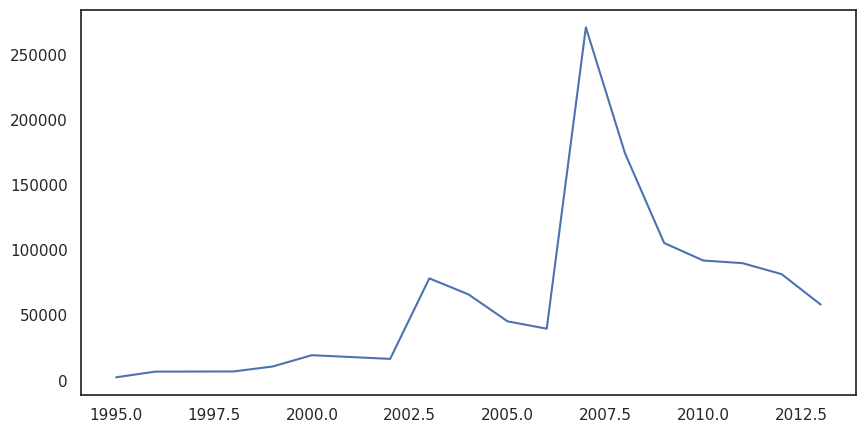

In [298]:
years = [1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


romania_data = []

for i in years:
  romania_data.append(romania_df[i])

plt.figure(figsize=(10,5))
plt.plot(years, romania_data)

In [ ]:
# remember 2007--> Romania becames part of the Europea Union

# Bulgaria

In [291]:
bulgaria_mask = df_sorted['Country'] == 'Bulgaria'
bulgaria_df = df_sorted[bulgaria_mask]

bulgaria_df

,Type,Coverage,Country,AreaName,RegName,DevName,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
217,Immigrants,Foreigners,Bulgaria,Europe,Eastern Europe,Developed regions,0,0,0,965,...,2361,2145,13362,8436,6244,5877,5101,4794,3734,67395


ValueError: ignored

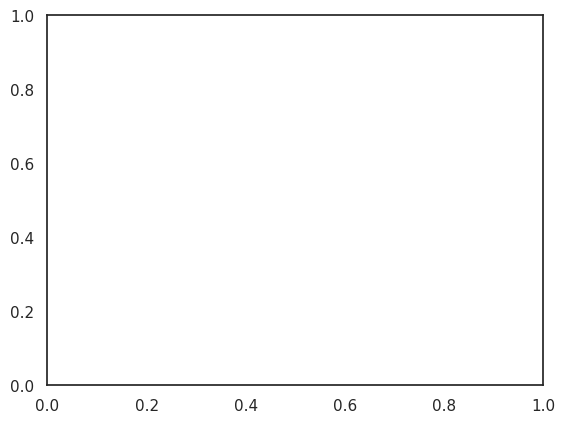

In [292]:
bulgaria_data = []

for i in range(len(bulgaria_df.columns)):
  bulgaria_data.append(bulgaria_df[years])

plt.plot(years, bulgaria_data)

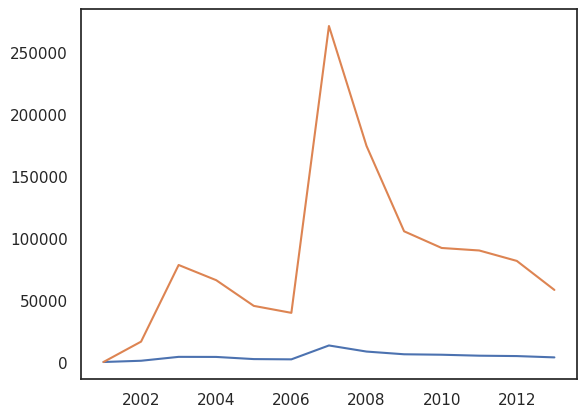

In [278]:
plt.plot(years, bulgaria_data)
plt.plot(years, romania_data)

# IRAQ

In [ ]:
iraq_mask = df_sorted['Country'] == 'Iraq'
iraq_df = df_sorted[iraq_mask]

iraq_df

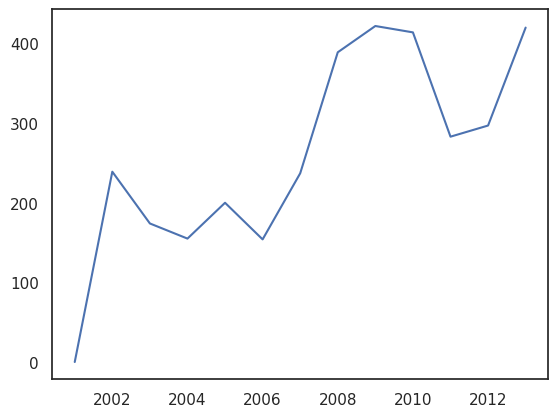

In [280]:
iraq_data = []

for i in years:
  iraq_data.append(iraq_df[i])

plt.plot(years, iraq_data)

# Albania

In [ ]:
albania_mask = df_sorted['Country'] == 'Albania'
albania_df = df_sorted[albania_mask]

albania_df

In [ ]:
albania_data = []

for i in years:
  albania_data.append(albania_df[i])

plt.plot(years, albania_data)

In [ ]:
plt.figure(figsize=(15,8))
sb.set(style="white")
splot = sb.barplot(y=df_sorted.Total.tail(10), x=df_sorted.Country.tail(10),
            palette="cubehelix", edgecolor=".2");

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'baseline', xytext = (0, 10), textcoords = 'offset points')

plt.xticks(rotation=45)

plt.show()

In [ ]:
continents = italy_imm_data.groupby('AreaName', axis=0).sum()
print(type(italy_imm_data.groupby('AreaName', axis=0)))
continents.head()

In [ ]:
colors_list = ['green', 'red', 'yellow', 'blue', 'orange', 'black']
explode_list = [0.1, 0.1, 0, 0.1, 0.1, 0]

continents['Total'].plot(kind='pie',
                           figsize=(15, 8),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.14,
                           colors=colors_list,
                           explode=explode_list
                           )

plt.title('Immigration to Italy by Continent [1990 - 2013]', y=1.14)
plt.axis('equal')

plt.legend(labels=continents.index, loc='upper left')

plt.show()

In [ ]:
years = list(map(int, range(2002, 2014)))
tot = pd.DataFrame(italy_imm_data[years].sum(axis=0))
tot.index = map(int, tot.index)
tot.reset_index(inplace = True)
tot.columns = ['year', 'total']
tot

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([1,1,1,1])
tot.plot( x='year', y='total', ax=ax)

ax.set_title('Total Immigration to Italy from 2002 - 2013')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Immigrants')

In [ ]:
x = tot['year']
y = tot['total']
fit = np.polyfit(x, y, deg=1)
fit

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'tot' with columns 'year' and 'total'
plt.figure(figsize=(8, 8))
plt.scatter(tot['year'], tot['total'])
plt.title('Total Immigration to Italy from 2002 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Assuming you have defined 'x' and 'fit' appropriately
plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()


In [ ]:
!pip install bar_chart_race

In [ ]:
italy_imm_data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML